In [14]:
import json
import requests
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly_express as px

Load JSON into a dictionary using `load`, print the dict keys and the number of keys

In [4]:
owid_data = open('owid-covid-data-pretty.json',)
owid_dict = json.load(owid_data)

print(len(owid_dict.keys()))
print(owid_dict.keys())

233
dict_keys(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MC

Load JSON into a dictionary using `loads`, print the number of dict keys

In [5]:
owid_data_stream = open('owid-covid-data-pretty.json', "r")
owid_dict = json.loads(owid_data_stream.read())

print(len(owid_dict.keys()))
print(len(owid_dict.values()))

233
233


Import dictionary into pandas dataframe

In [6]:
df_owid = pd.DataFrame(owid_dict)
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, continent to male_smokers
Columns: 233 entries, AFG to ZWE
dtypes: object(233)
memory usage: 32.9+ KB


In [7]:
res = requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json').json()

Import dict into pandas dataframe

In [8]:
df_owid = pd.read_json('owid-covid-data-pretty.json')
df_owid.head(4)

,AFG,OWID_AFR,ALB,DZA,AND,AGO,AIA,ATG,ARG,ARM,...,UZB,VUT,VAT,VEN,VNM,WLF,OWID_WRL,YEM,ZMB,ZWE
continent,Asia,NaN,Europe,Africa,Europe,Africa,North America,North America,South America,Asia,...,Asia,Oceania,Europe,South America,Asia,Oceania,NaN,Asia,Africa,Africa
location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
population,39835428.0,1373486472.0,2872934.0,44616626.0,77354.0,33933611.0,15125.0,98728.0,45605823.0,2968128.0,...,33935765.0,314464.0,812.0,28704947.0,98168829.0,11094.0,7874965730.0,30490639.0,18920657.0,15092171.0
population_density,54.422,NaN,104.871,17.348,163.755,23.89,NaN,231.845,16.177,102.931,...,76.134,22.662,NaN,36.253,308.127,NaN,58.045,53.508,22.995,42.729


In [19]:
covid_dict = json.load(open('owid-covid-data-pretty.json',))
# get the dict values
covid_values = covid_dict.values()
# convert the values into a list
covid_list = list(covid_values)
# create a dataframe from the list
df_covid = pd.json_normalize(
    data=covid_list,
    record_path=['data'],
    meta=[
        'continent'
        ,'location'
    ],
#       ,'population'
#       ,'population_density'
#       , 'median_age'
#       ,'aged_65_older'
#       ,'aged_70_older'
#       ,'gdp_per_capita'
#       ,'cardiovasc_death_rate'
#       ,'diabetes_prevalence'
#       ,'handwashing_facilities'
#       ,'hospital_beds_per_thousand'
#       ,'life_expectancy'
#       ,'human_development_index'
#     ],
    errors='ignore'
)
print(df_covid.info())


# df_owid = pd.json_normalize(
#     data=covid_list,
#     errors='ignore'
# )
# print(df_owid.info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125311 entries, 0 to 125310
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     125311 non-null  object 
 1   total_cases                              118548 non-null  float64
 2   new_cases                                118544 non-null  float64
 3   total_cases_per_million                  117925 non-null  float64
 4   new_cases_per_million                    117921 non-null  float64
 5   stringency_index                         104569 non-null  float64
 6   new_cases_smoothed                       117530 non-null  float64
 7   new_deaths_smoothed                      117530 non-null  float64
 8   new_cases_smoothed_per_million           116912 non-null  float64
 9   new_deaths_smoothed_per_million          116912 non-null  float64
 10  total_deaths                    

In [11]:
df_covid['population'] = pd.to_numeric(df_covid['population'], downcast='float')
df_covid['population_density'] = pd.to_numeric(df_covid['population_density'], downcast='float')
df_covid['median_age'] = pd.to_numeric(df_covid['median_age'], downcast='float')
df_covid['aged_65_older'] = pd.to_numeric(df_covid['aged_65_older'], downcast='float')
df_covid['aged_70_older'] = pd.to_numeric(df_covid['aged_70_older'], downcast='float')
df_covid['gdp_per_capita'] = pd.to_numeric(df_covid['gdp_per_capita'], downcast='float')
df_covid['cardiovasc_death_rate'] = pd.to_numeric(df_covid['cardiovasc_death_rate'], downcast='float')
df_covid['diabetes_prevalence'] = pd.to_numeric(df_covid['diabetes_prevalence'], downcast='float')
df_covid['handwashing_facilities'] = pd.to_numeric(df_covid['handwashing_facilities'], downcast='float')
df_covid['hospital_beds_per_thousand'] = pd.to_numeric(df_covid['hospital_beds_per_thousand'], downcast='float')
df_covid['life_expectancy'] = pd.to_numeric(df_covid['life_expectancy'], downcast='float')
df_covid['human_development_index'] = pd.to_numeric(df_covid['human_development_index'], downcast='float')

df_covid['continent'] = df_covid.continent.astype(str)
df_covid['location'] = df_covid.location.astype(str)

print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125311 entries, 0 to 125310
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     125311 non-null  object 
 1   total_cases                              118548 non-null  float64
 2   new_cases                                118544 non-null  float64
 3   total_cases_per_million                  117925 non-null  float64
 4   new_cases_per_million                    117921 non-null  float64
 5   stringency_index                         104569 non-null  float64
 6   new_cases_smoothed                       117530 non-null  float64
 7   new_deaths_smoothed                      117530 non-null  float64
 8   new_cases_smoothed_per_million           116912 non-null  float64
 9   new_deaths_smoothed_per_million          116912 non-null  float64
 10  total_deaths                    

In [16]:
# mod_1 = smf.ols('total_deaths ~ total_cases + total_vaccinations + total_tests + excess_mortality + icu_patients + hosp_patients + population_density + median_age + gdp_per_capita + cardiovasc_death_rate + diabetes_prevalence + handwashing_facilities + hospital_beds_per_thousand + life_expectancy + human_development_index', data=df_covid)
# res_1 = mod_1.fit()
# print(res_1.summary())

In [26]:
# df_covid = df_covid.drop(['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'], axis=1)

df_covid.head()



'2021-10-21'

In [29]:
df_covid20 = df_covid[df_covid['date']==df_covid['date'].max()]


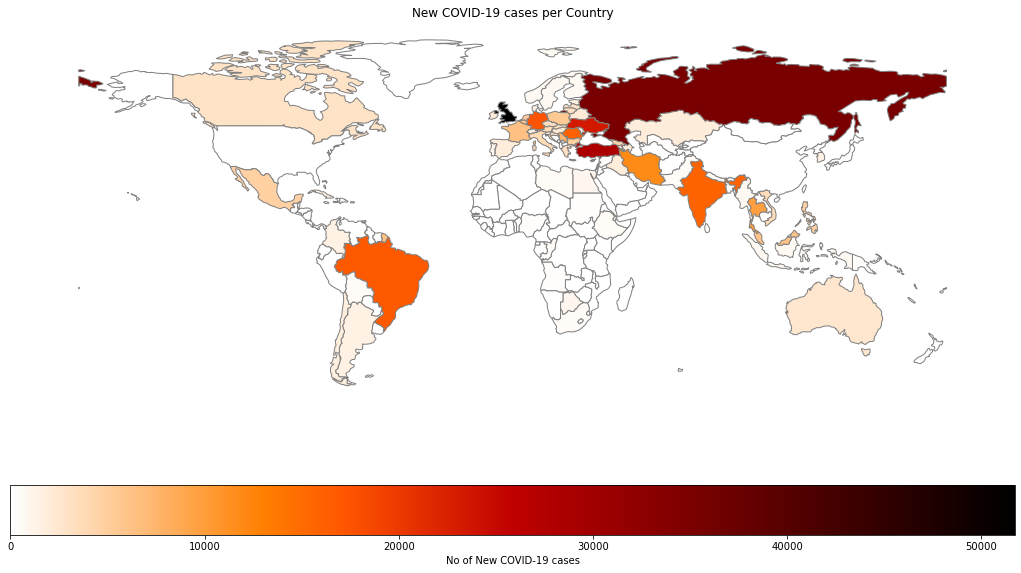

In [51]:
# grad the inbuilt world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# A merged data frame is generated based on confirmed20 and world GeoPandas dataframe
cworld = world.merge(df_covid20,how= 'left',left_on='name',right_on='location')
cworld = cworld[world.name!="Antarctica"]
cworld['new_cases'] = cworld['new_cases'].fillna(0)

#Finally, generate the choropleth map



#Generate the choropleth map using gdf plot function on the Confirmed column
fig = cworld.plot(column='new_cases',cmap='gist_heat_r',edgecolor="grey", figsize=(18,10), legend = True
            ,legend_kwds={'label': "No of New COVID-19 cases",
                          'orientation': "horizontal"})
#removing axis ticks
plt.axis('off')
#Add the title
plt.title("New COVID-19 cases per Country")
plt.show()

/var/folders/f6/d62tg7156r94r5l_ck716qg00000gn/T/ipykernel_50087/3549433376.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = cworld.centroid


SyntaxError: keyword argument repeated: markersize (3549433376.py, line 7)

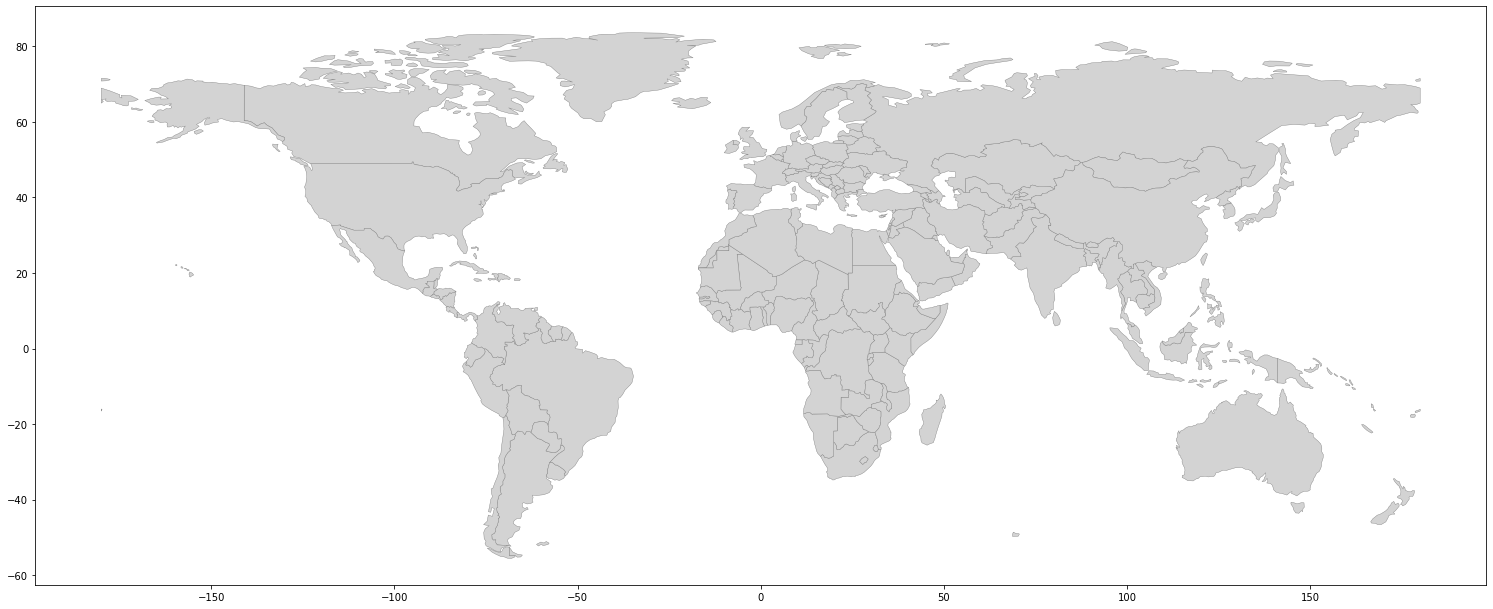

In [63]:

centroids = cworld.copy()
centroids.geometry = cworld.centroid
centroids['size'] = centroids['new_cases'] / 1000000  # to get reasonable plotable numbe

fig, ax = plt.subplots(figsize=(26,26))
cworld.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.4)
centroids.plot(markersize='size', ax=ax,cmap='gist_heat_r', markersize='new_cases',alpha=0.7, categorical=False, legend=True )
ax.axis('off')
plt.axis('equal')
plt.show()

In [77]:
# df = px.data.gapminder()
df_covid['new_cases'] = df_covid['new_cases'].fillna(0)
df_covid['new_cases'] = df_covid['new_cases'].apply(lambda x: x if x >= 0 else 0 )

# df_covid.to_csv('df_covid')
# print(df_covid['new_cases'].min())

fig = px.scatter_geo(df_covid, locations="location", color="continent",
                     hover_name="location", size="new_cases",
                     animation_frame="date",
                     projection="natural earth")
fig.show()

0.0


KeyError: (nan, '', '2020-02-24', '', '')